DBSCAN

In [ ]:
#EXERCISE: Try changing the values of eps and min_samples and observe how the number of clusters the classification changes.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sns.set_style('darkgrid')

In [2]:
# load the iris dataset
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
X = iris_df[numeric_cols]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
from sklearn.cluster import DBSCAN

In [20]:
model = DBSCAN(eps=0.8, min_samples=4)
model.fit(X)

DBSCAN(eps=0.8, min_samples=4)

In [21]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

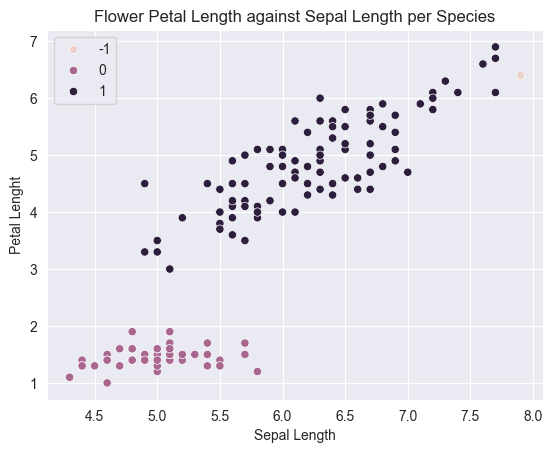

In [22]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=model.labels_)
plt.title('Flower Petal Length against Sepal Length per Species')
plt.ylabel('Petal Lenght')
plt.xlabel('Sepal Length')
plt.show()

Dimensionality Reduction and Manifold Learning

In [23]:
import dataidea as di
from sklearn.decomposition import PCA

In [36]:
# load the penguin dataset
sns.get_dataset_names()
ping_df = sns.load_dataset('penguins')
ping_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [37]:
ping_df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [33]:
ping_df['bill_length_mm'] = ping_df.bill_length_mm.ffill()
ping_df['bill_depth_mm'] = ping_df.bill_depth_mm.ffill()
ping_df['flipper_length_mm'] = ping_df.flipper_length_mm.ffill()
ping_df['body_mass_g'] = ping_df.body_mass_g.ffill()
ping_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [34]:
numeric_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
X = ping_df[numeric_cols]
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0


In [38]:
pca = PCA(n_components=2)
pca.fit(X)


PCA(n_components=2)

In [39]:
transformed = pca.transform(X)

<Axes: >

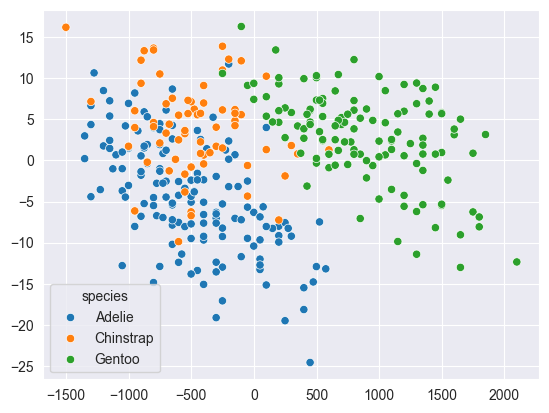

In [40]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=ping_df['species'])

t-Distributed Stochastic Neighbor Embedding (t-SNE)


In [41]:
from sklearn.manifold import TSNE

In [43]:
tsne = TSNE(n_components=2)
transformed = tsne.fit_transform(X)

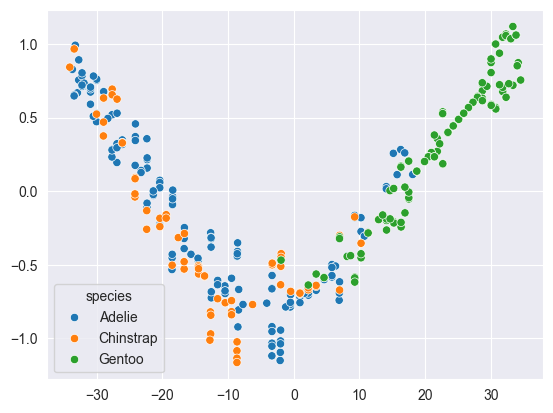

In [44]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=ping_df['species']);